<a href="https://colab.research.google.com/github/Oleksandr190378/data-computing/blob/main/Hm2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Частина 3

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
file_path = r'/content/drive/My Drive/Colab Notebooks/bestsellers with categories.csv'
users = pd.read_csv(file_path)

users.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [10]:
users.shape

(550, 7)

Про скільки книг зберігає дані датасет? 550 книг

In [11]:
users.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [6]:
users.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
users.columns


Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

In [14]:
users.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? Ні

In [15]:
users['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри?  'Non Fiction', 'Fiction'

<Axes: xlabel='price', ylabel='Count'>

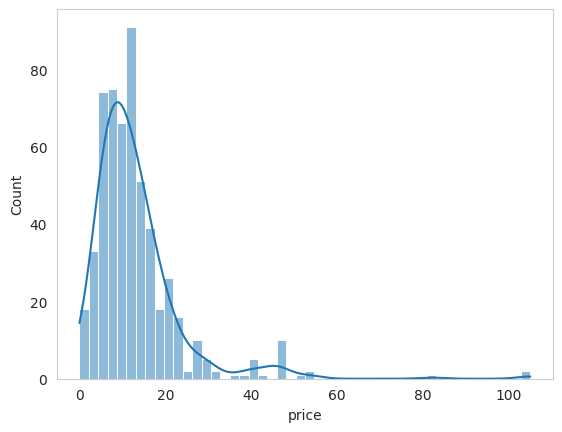

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.grid()
sns.histplot(x = 'price', data = users, kde=True)


In [23]:
users['price'].agg(['max', 'min', 'median', 'mean'])

max       105.0
min         0.0
median     11.0
mean       13.1
Name: price, dtype: float64

Максимальна ціна?  105.0
Мінімальна ціна?  0.0
Середня ціна?  13.1
Медіанна ціна?  11.0


In [24]:
users['user_rating'].max()

4.9

Який рейтинг у датасеті найвищий? 4.9

In [27]:
users[users['user_rating']==users['user_rating'].max()]['name'].count()

52

Скільки книг мають такий рейтинг?  52

In [29]:
users[users['reviews']==users['reviews'].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Яка книга має найбільше відгуків?  Where the Crawdads Sing

In [34]:
users2 = users[users['year']==2015]
users2[users2['price']==users2['price'].max()]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча ?  Publication Manual of the American Psychologic...

In [38]:
users[(users['genre'] == 'Fiction')&(users['year']==2010)]['name'].count()

20

Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?  20

In [39]:
users[(users['user_rating']==4.9) & (users['year'].isin([2010,2011]))]['name'].count()

1

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?  1

In [8]:
sorted_books = users[(users['year'] == 2015) & (users['price'] < 8)].sort_values('price')

sorted_books

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Яка книга остання у відсортованому списку?  Old School (Diary of a Wimpy Kid #10)

In [9]:
genre_books = users.groupby(by='genre')['price'].agg( ['min', 'max'])
genre_books

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0

In [10]:
author_books = users.groupby(by='author').agg( 'count')['name']
author_books.columns = 'quantity'
author_books

author
Abraham Verghese              2
Adam Gasiewski                1
Adam Mansbach                 1
Adir Levy                     1
Admiral William H. McRaven    1
                             ..
Walter Isaacson               3
William Davis                 2
William P. Young              2
Wizards RPG Team              3
Zhi Gang Sha                  2
Name: name, Length: 248, dtype: int64

In [71]:
author_books.shape

(248,)

In [11]:
author_books[author_books ==author_books.max()]

author
Jeff Kinney    12
Name: name, dtype: int64

Якої розмірності вийшла таблиця? (248,)
Який автор має найбільше книг? Jeff Kinney
Скільки книг цього автора? 12

In [12]:
author_rating = users.groupby(by='author')['user_rating'].agg( 'mean').round(1)
author_rating

author
Abraham Verghese              4.6
Adam Gasiewski                4.4
Adam Mansbach                 4.8
Adir Levy                     4.8
Admiral William H. McRaven    4.7
                             ... 
Walter Isaacson               4.6
William Davis                 4.4
William P. Young              4.6
Wizards RPG Team              4.8
Zhi Gang Sha                  4.6
Name: user_rating, Length: 248, dtype: float64

In [54]:
author_rating.shape

(248,)

In [55]:
author_rating[author_rating==author_rating.min()]

author
Donna Tartt    3.9
Name: user_rating, dtype: float64

У якого автора середній рейтинг мінімальний? Donna Tartt
Який у цього автора середній рейтинг?  3.9

In [13]:
author= pd.concat([author_books, author_rating], axis=1)
author.columns = ['quantity', 'user_rating']
author

,quantity,user_rating
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7
...,...,...
Walter Isaacson,3,4.6
William Davis,2,4.4
William P. Young,2,4.6


In [14]:
author_sorted =author.sort_values(['quantity', 'user_rating'])
author_sorted

,quantity,user_rating
author,,
Muriel Barbery,1,4.0
Chris Cleave,1,4.1
Ian K. Smith M.D.,1,4.1
Pierre Dukan,1,4.1
Elizabeth Strout,1,4.2
...,...,...
American Psychological Association,10,4.5
Gary Chapman,11,4.7
Suzanne Collins,11,4.7


Який автор перший у списку?  Muriel Barbery


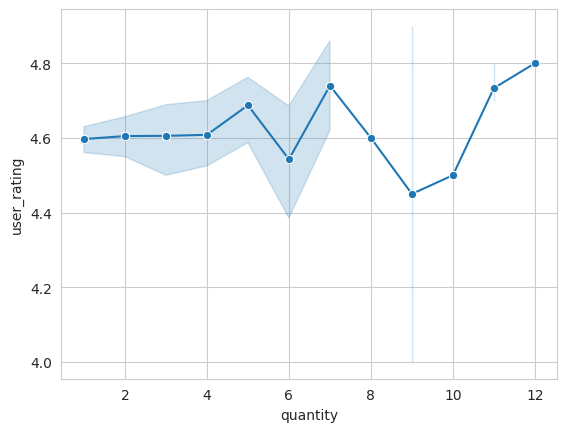

In [15]:
sns.set_style("whitegrid")

sns.lineplot(x='quantity', y='user_rating',data=author_sorted, marker='o')
plt.show()





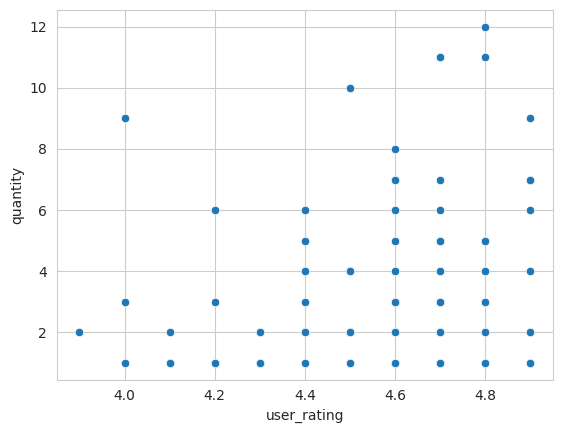

In [114]:
sns.set_style("whitegrid")

sns.scatterplot( x='user_rating', y='quantity',data=author_sorted)
plt.show()

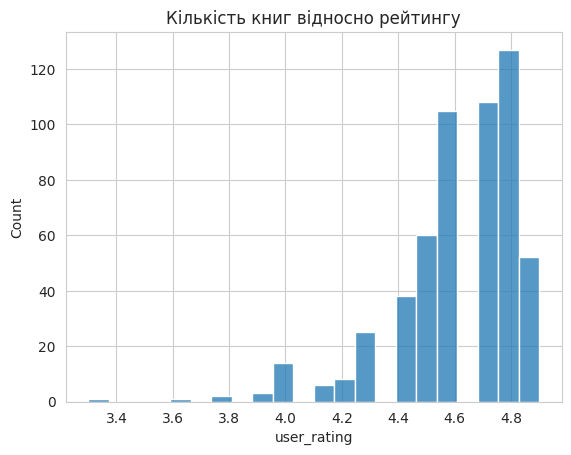

In [119]:
sns.histplot(x = 'user_rating', data = users)
ax =plt.gca()
ax.set_title('Кількість книг відносно рейтингу')
plt.show()

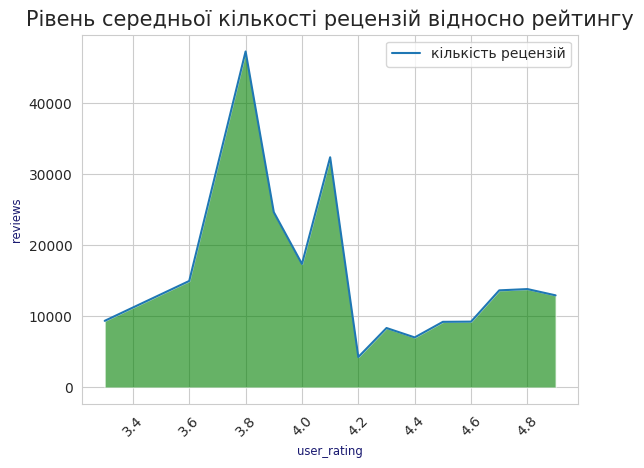

In [108]:
a = users['user_rating'].drop_duplicates().to_list()
a.sort()
b = users.groupby(by='user_rating')['reviews'].agg( 'mean').round(1)

plt.plot(a,b, label='кількість рецензій')
plt.fill_between(a, b, facecolor='g', alpha=0.6)
plt.xlabel("user_rating", fontsize="small", color="midnightblue")
plt.xticks(rotation=45)
plt.ylabel("reviews", fontsize="small", color="midnightblue")
plt.title("Рівень середньої кількості рецензій відносно рейтингу", fontsize=15)
plt.legend()
plt.show()